# Play around with FFXIV api

URL: https://xivapi.com

Goal: see if we can download icon images for each job's abilities

In [1]:
import json
import requests

from IPython.display import Image, display

In [2]:
BASE_URL = 'https://xivapi.com'

## Get a random image and display in notebook

In [3]:
# Found url from an example
r = requests.get(f'{BASE_URL}/cj/1/conjurer.png', stream=True)

In [4]:
r.status_code

200

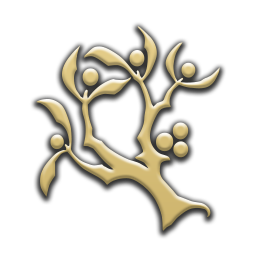

In [5]:
Image(r.content)

## Find job ability icons

In [6]:
r = requests.get(f'{BASE_URL}/content')
content_names = r.json()
content_names[:10]

['AOZArrangement',
 'AOZBoss',
 'AOZContent',
 'AOZContentBriefingBNpc',
 'AOZReport',
 'AOZScore',
 'Achievement',
 'AchievementCategory',
 'AchievementHideCondition',
 'AchievementKind']

In [7]:
r = requests.get(f'{BASE_URL}/ClassJob')
r.json()['Results']

[{'ID': 1,
  'Icon': '/cj/1/gladiator.png',
  'Name': 'gladiator',
  'Url': '/ClassJob/1'},
 {'ID': 2,
  'Icon': '/cj/1/pugilist.png',
  'Name': 'pugilist',
  'Url': '/ClassJob/2'},
 {'ID': 3,
  'Icon': '/cj/1/marauder.png',
  'Name': 'marauder',
  'Url': '/ClassJob/3'},
 {'ID': 4, 'Icon': '/cj/1/lancer.png', 'Name': 'lancer', 'Url': '/ClassJob/4'},
 {'ID': 5, 'Icon': '/cj/1/archer.png', 'Name': 'archer', 'Url': '/ClassJob/5'},
 {'ID': 6,
  'Icon': '/cj/1/conjurer.png',
  'Name': 'conjurer',
  'Url': '/ClassJob/6'},
 {'ID': 7,
  'Icon': '/cj/1/thaumaturge.png',
  'Name': 'thaumaturge',
  'Url': '/ClassJob/7'},
 {'ID': 8,
  'Icon': '/cj/1/carpenter.png',
  'Name': 'carpenter',
  'Url': '/ClassJob/8'},
 {'ID': 9,
  'Icon': '/cj/1/blacksmith.png',
  'Name': 'blacksmith',
  'Url': '/ClassJob/9'},
 {'ID': 10,
  'Icon': '/cj/1/armorer.png',
  'Name': 'armorer',
  'Url': '/ClassJob/10'},
 {'ID': 11,
  'Icon': '/cj/1/goldsmith.png',
  'Name': 'goldsmith',
  'Url': '/ClassJob/11'},
 {'ID': 12,


In [8]:
for content_name in content_names:
    if 'Action' in content_name:
        print(content_name)

Action
ActionCastTimeline
ActionCastVFX
ActionCategory
ActionComboRoute
ActionIndirection
ActionParam
ActionProcStatus
ActionTimeline
ActionTimelineMove
ActionTimelineReplace
ActionTransient
AozAction
AozActionTransient
BuddyAction
CompanyAction
ContentExAction
CraftAction
EurekaMagiaAction
EventAction
GeneralAction
ItemAction
ItemActionTelepo
MountAction
PetAction
PvPAction
PvPActionSort


In [9]:
r = requests.get(f'{BASE_URL}/ClassJob/26')
arc_json = r.json()

In [10]:
r = requests.get(f'{BASE_URL}/ClassJob/24')
whm_json = r.json()

In [11]:
# Load in viewer for easier inspection
with open('./whm.json', 'w') as outfile:
    json.dump(whm_json, outfile, indent=4)
    
with open('./arc.json', 'w') as outfile:
    json.dump(arc_json, outfile, indent=4)

In [12]:
r = requests.get(f'{BASE_URL}/ClassJob/')
r.json()

{'Pagination': {'Page': 1,
  'PageNext': None,
  'PagePrev': None,
  'PageTotal': 1,
  'Results': 40,
  'ResultsPerPage': 100,
  'ResultsTotal': 40},
 'Results': [{'ID': 1,
   'Icon': '/cj/1/gladiator.png',
   'Name': 'gladiator',
   'Url': '/ClassJob/1'},
  {'ID': 2,
   'Icon': '/cj/1/pugilist.png',
   'Name': 'pugilist',
   'Url': '/ClassJob/2'},
  {'ID': 3,
   'Icon': '/cj/1/marauder.png',
   'Name': 'marauder',
   'Url': '/ClassJob/3'},
  {'ID': 4,
   'Icon': '/cj/1/lancer.png',
   'Name': 'lancer',
   'Url': '/ClassJob/4'},
  {'ID': 5,
   'Icon': '/cj/1/archer.png',
   'Name': 'archer',
   'Url': '/ClassJob/5'},
  {'ID': 6,
   'Icon': '/cj/1/conjurer.png',
   'Name': 'conjurer',
   'Url': '/ClassJob/6'},
  {'ID': 7,
   'Icon': '/cj/1/thaumaturge.png',
   'Name': 'thaumaturge',
   'Url': '/ClassJob/7'},
  {'ID': 8,
   'Icon': '/cj/1/carpenter.png',
   'Name': 'carpenter',
   'Url': '/ClassJob/8'},
  {'ID': 9,
   'Icon': '/cj/1/blacksmith.png',
   'Name': 'blacksmith',
   'Url': '/C

In [13]:
# Found that action IDs live at GameContentLinks => Action => ClassJob
whm_icon_ids = whm_json['GameContentLinks']['Action']['ClassJob']
whm_icon_ids

[131,
 136,
 137,
 139,
 140,
 3568,
 3569,
 3570,
 3571,
 7430,
 7431,
 7432,
 7433,
 8895,
 8896,
 8900,
 9621,
 16531,
 16532,
 16533,
 16534,
 16535,
 16536,
 17789,
 17790,
 17791,
 17793,
 17794,
 9620,
 13975,
 18945,
 18946,
 25859,
 25860,
 25861,
 25862]

In [14]:
# Now where do actions live? Action?
for whm_icon_id in whm_icon_ids:
    r = requests.get(f'{BASE_URL}/Action/{whm_icon_id}')
    print(whm_icon_id, r.json()['Name'])

131 Cure III
136 Presence of Mind
137 Regen
139 Holy
140 Benediction
3568 Stone III
3569 Asylum
3570 Tetragrammaton
3571 Assize
7430 Thin Air
7431 Stone IV
7432 Divine Benison
7433 Plenary Indulgence
8895 Cure
8896 Cure II
8900 Fluid Aura
9621 Divine Benison
16531 Afflatus Solace
16532 Dia
16533 Glare
16534 Afflatus Rapture
16535 Afflatus Misery
16536 Temperance
17789 Glare
17790 Dia
17791 Afflatus Solace
17793 Afflatus Misery
17794 Temperance
9620 Assize
13975 Tetragrammaton
18945 Medica
18946 Afflatus Rapture
25859 Glare III
25860 Holy III
25861 Aquaveil
25862 Liturgy of the Bell


In [15]:
# Getting there! Now, how to get the icon image for each ability?
for whm_icon_id in whm_icon_ids:
    r = requests.get(f'{BASE_URL}/Action/{whm_icon_id}')
    print(whm_icon_id, r.json()['Icon'])

131 /i/000000/000407.png
136 /i/002000/002626.png
137 /i/002000/002628.png
139 /i/002000/002629.png
140 /i/002000/002627.png
3568 /i/002000/002631.png
3569 /i/002000/002632.png
3570 /i/002000/002633.png
3571 /i/002000/002634.png
7430 /i/002000/002636.png
7431 /i/002000/002637.png
7432 /i/002000/002638.png
7433 /i/002000/002639.png
8895 /i/009000/009273.png
8896 /i/009000/009274.png
8900 /i/000000/000784.png
9621 /i/000000/000784.png
16531 /i/002000/002640.png
16532 /i/002000/002641.png
16533 /i/002000/002642.png
16534 /i/002000/002643.png
16535 /i/002000/002644.png
16536 /i/002000/002645.png
17789 /i/009000/009439.png
17790 /i/009000/009440.png
17791 /i/009000/009437.png
17793 /i/009000/009436.png
17794 /i/009000/009441.png
9620 /i/009000/009275.png
13975 /i/009000/009334.png
18945 /i/009000/009516.png
18946 /i/009000/009517.png
25859 /i/002000/002646.png
25860 /i/002000/002647.png
25861 /i/002000/002648.png
25862 /i/002000/002649.png


Cure III (131)


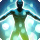

Benediction (140)


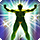

Medica (18945)


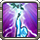

In [32]:
# Now let's try printing some of these images
for ability_name, whm_icon_id in zip(['Cure III', 'Benediction', 'Medica'], [131, 140, 18945]):
    r = requests.get(f'{BASE_URL}/Action/{whm_icon_id}')
    icon_path = r.json()['Icon']
    r = requests.get(f'{BASE_URL}/{icon_path}')
    print(f'{ability_name} ({whm_icon_id})')
    display(Image(r.content))

## Awesome! Looks like we can get these images as needed now

## Edit: Fount out we can get HD images by appending '_hr1'

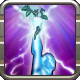

In [39]:
# Getting there! Now, how to get the icon image for each ability?
r = requests.get(f'{BASE_URL}/i/009000/009516_hr1.png')
#print(r.json())
Image(r.content)